In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/android-data/apps.csv
/kaggle/input/android-data/user_reviews.csv


## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [2]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('../input/android-data/apps.csv')

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape)

# Have a look at a random sample of 5 rows
apps.sample(5)

Total number of apps in the dataset =  (9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5012,6005,BD Data Plan (3G & 4G),COMMUNICATION,4.4,10341,6.9,"500,000+",Free,0,Everyone,Communication,"July 5, 2018",5.2.4,4.1 and up
8325,9450,Super Sport Car Simulator,FAMILY,4.2,58553,50.0,"1,000,000+",Free,0,Everyone,Simulation,"December 25, 2016",3.1,2.3.3 and up
2178,2788,"Savory - Deals,Freebies,Sales",SHOPPING,4.4,2375,1.1,"100,000+",Free,0,Everyone,Shopping,"November 2, 2016",3.1,2.3.3 and up
7368,8462,"Quik – Free Video Editor for photos, clips, music",VIDEO_PLAYERS,4.7,696665,91.0,"10,000,000+",Free,0,Everyone,Video Players & Editors,"July 5, 2018",4.7.4.3869-7b2372c3e,5.0 and up
1743,2241,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device


## 2. Data cleaning

In [3]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Correcting data types


In [5]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype('float64')

# Convert Price to float data type
apps['Price'] = apps['Price'].astype('float64')

# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


## 4. Exploring app categories


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'BUSINESS'),
  Text(4, 0, 'MEDICAL'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'PRODUCTIVITY'),
  Text(7, 0, 'LIFESTYLE'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'SPORTS'),
  Text(10, 0, 'COMMUNICATION'),
  Text(11, 0, 'HEALTH_AND_FITNESS'),
  Text(12, 0, 'PHOTOGRAPHY'),
  Text(13, 0, 'NEWS_AND_MAGAZINES'),
  Text(14, 0, 'SOCIAL'),
  Text(15, 0, 'BOOKS_AND_REFERENCE'),
  Text(16, 0, 'TRAVEL_AND_LOCAL'),
  Text(17, 0, 'SHOPPING'),
  Text(18, 0, 'DATING'),
  Text(19, 0, 'VIDEO_PLAYERS'),
  Text(20, 0, 'MAPS_AND_NAVIGATION'),
  Text(21, 0, 'EDUCATION'),
  Text(22, 0, 'FOOD_AND_DRINK'),
  Text(23, 0, 'ENTERTAINMENT'),
  Text(24, 0, 'AUTO_AND_VEHICLES'),
  Text(25, 0, 'LIBRARIES_AND_DEMO'),
  Text(26, 0, 'WEATHER'),
  Text(27, 0, 'HOUSE_AND_HOME'),
  Text(28,

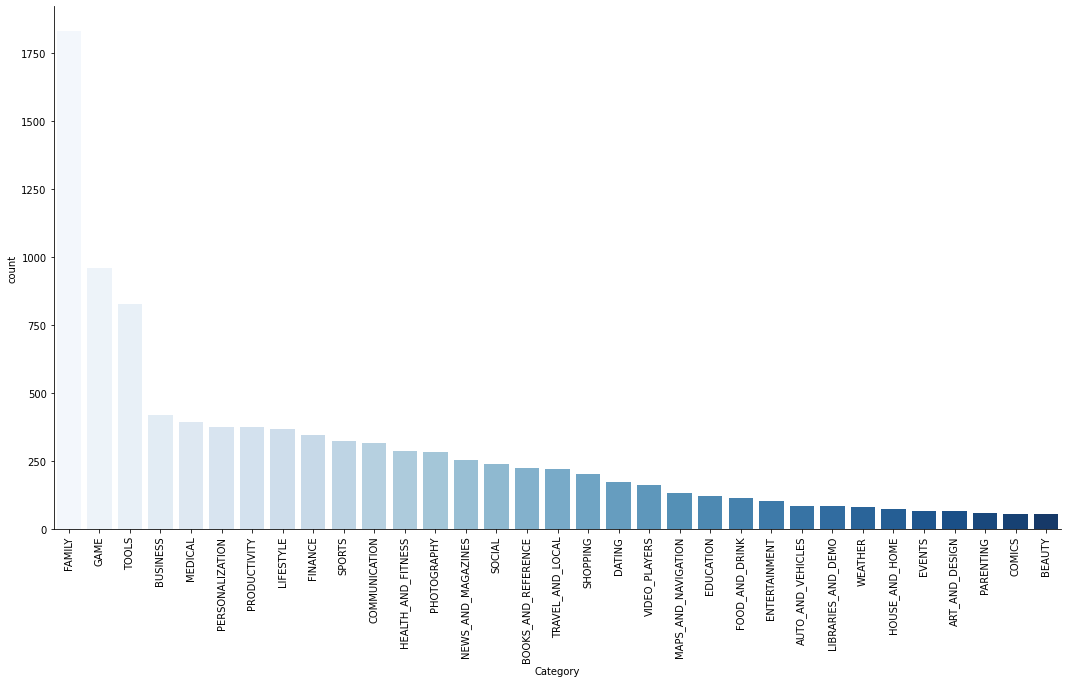

In [6]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(100,100))
apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
# print(apps_in_category)

p =sns.catplot(kind='count',
            data=apps,
           x='Category',
          order= apps_in_category.index,
          height=8,
        aspect=15/8,
        palette='Blues')

plt.xticks(rotation=90)

# Print the total number of unique categories
# num_categories = apps['Category'].unique()
# print('Number of categories = ', num_categories)

# # Count the number of apps in each 'Category'. 

# # Sort num_apps_in_category in descending order based on the count of apps in each category
# sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

# data = [go.Bar(
#         x = num_apps_in_category.index, # index = category name
#         y = num_apps_in_category.values, # value = count
# )]

# plotly.offline.iplot(data)


## 5. Distribution of app ratings


Average app rating =  4.173243045387994


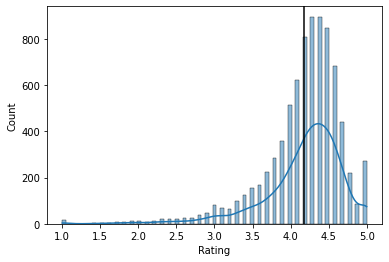

In [7]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

sns.histplot(apps['Rating'],kde=True)
plt.axvline(x=avg_app_rating,
            color='black')
plt.show()

## 6. Size and price of an app


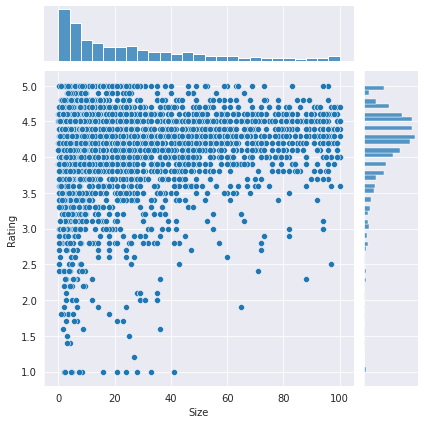

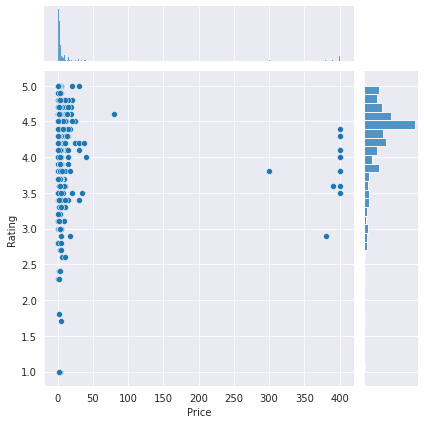

In [8]:
import seaborn as sns
sns.set_style("darkgrid")
# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']
# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])
plt.show()

## 7. Relation between app category and app price


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


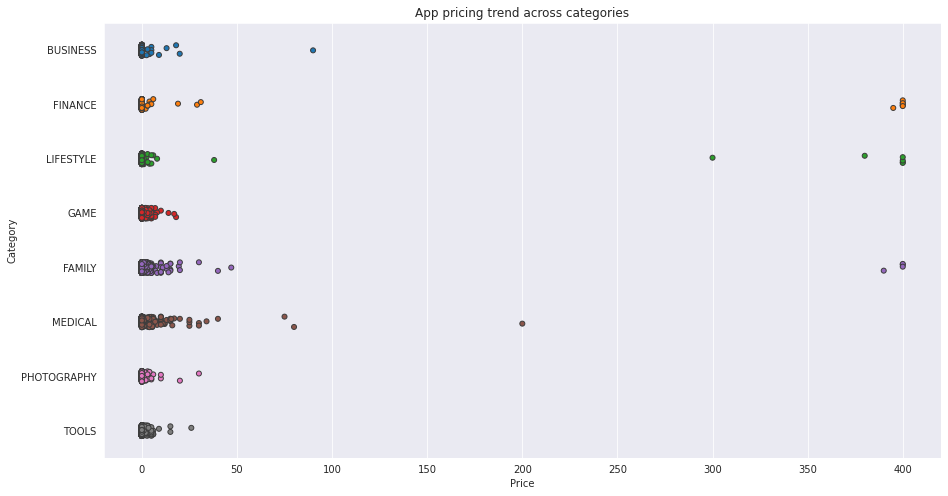

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats['Category'], linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats["Price"]>200]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

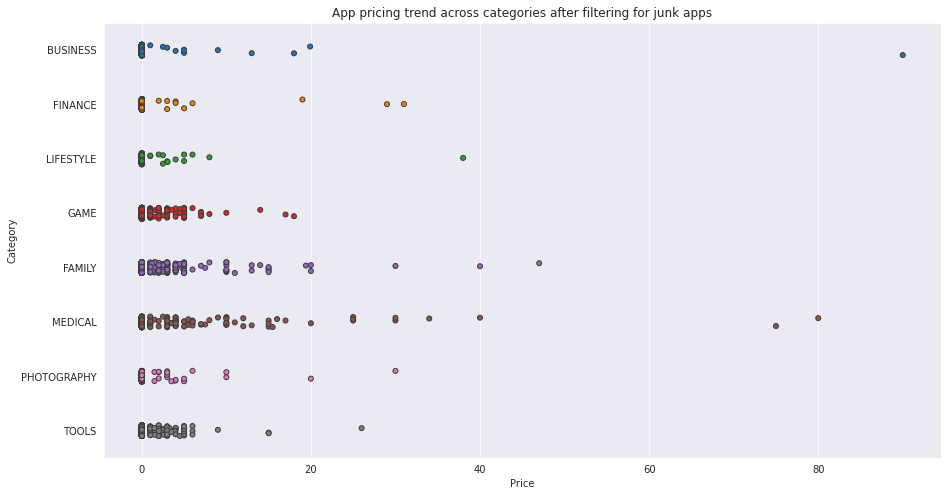

In [10]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y ="Category" , data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularity of paid apps vs free apps


In [11]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

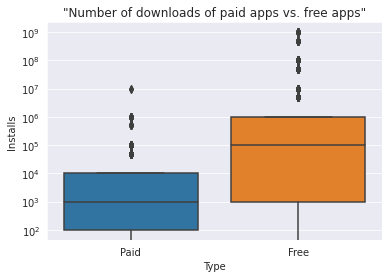

In [12]:
g=sns.boxplot(x=apps['Type'],
          y=apps['Installs'],
           order=['Paid','Free'],
             )
g.set_yscale("log")
g.set_title('"Number of downloads of paid apps vs. free apps"')
plt.show()

## 10. Sentiment analysis of user reviews

In [13]:
# Load user_reviews.csv
reviews_df = pd.read_csv('../input/android-data/user_reviews.csv')
reviews_df.head()

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

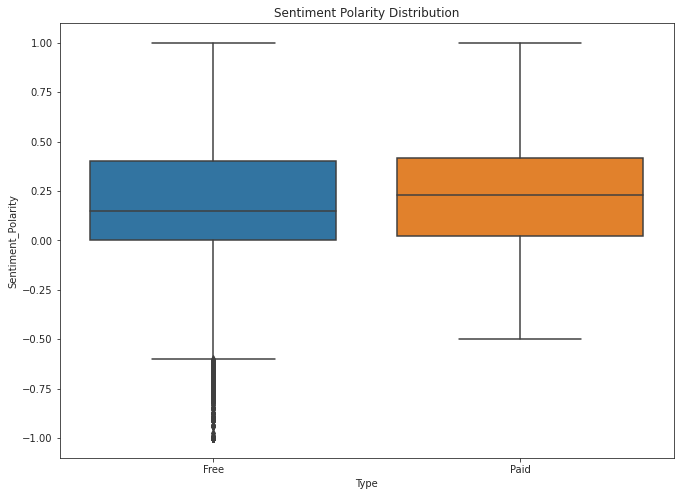

In [14]:
# Join the two dataframes
merged_df =reviews_df.merge(apps,on='App') 

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')